## Applications of logistic regression
- Credit Scoring
- Sentiment Analysis
- Disease (diabetes, cancer etc.) prediction: Predicting whether the patient has disease or not is the objective of this use case.
- Weather prediction

## Problem Statement
- Want to predict who among our employees is likely to leave

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot  import figure
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('emp_analytics.csv')

In [85]:
df.shape

(14999, 10)

In [6]:
df.sample(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
924,0.42,0.56,2,147,3,0,1,0,sales,medium
13932,0.98,0.74,4,151,3,0,0,0,sales,medium
7631,0.77,0.62,5,190,3,0,0,0,RandD,low
10597,0.79,0.44,2,236,3,0,0,0,IT,medium
7585,0.74,0.90,3,285,3,0,0,0,accounting,low
11568,0.57,0.69,3,212,8,0,0,0,product_mng,low
5701,0.74,0.55,6,130,2,0,0,0,support,medium
12800,0.59,0.88,3,159,2,0,0,0,technical,medium
160,0.10,0.95,7,301,4,0,1,0,marketing,low
522,0.10,0.95,7,289,4,0,1,0,IT,low


Those who left - 1
Those who haven't left- 0

In [3]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [8]:
df[['promotion_last_5years']].value_counts()

promotion_last_5years
0                        14680
1                          319
dtype: int64

In [9]:
df.shape

(14999, 10)

In [10]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [12]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [12]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

# Salary

<AxesSubplot:xlabel='salary', ylabel='count'>

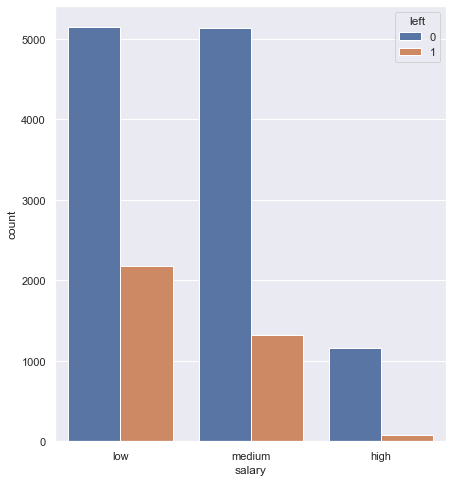

In [20]:
sns.set(rc={'figure.figsize':(7,8)})
sns.set_theme(style="darkgrid")
sns.countplot(x="salary", data=df, hue='left')


Above chart shows employees with high salaries are likely to not leave the company

## Number of projects

<AxesSubplot:xlabel='number_project', ylabel='count'>

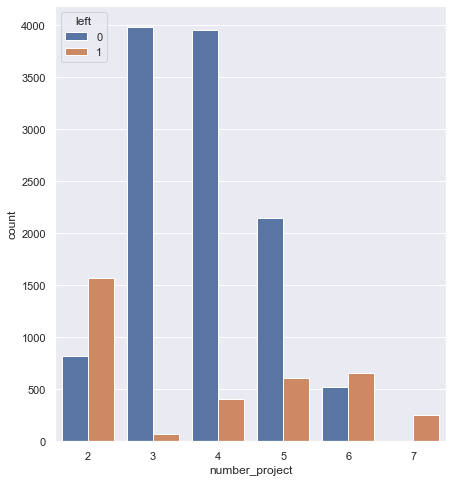

In [18]:
sns.set(rc={'figure.figsize':(7,8)})
sns.set_theme(style="darkgrid")
sns.countplot(x="number_project", data=df, hue='left')

Above chart shows employees with 3 to 4 projects are not likely to leave the company

Above chart shows employees with 7 projects are also leaving the company

## Time spent in the company

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

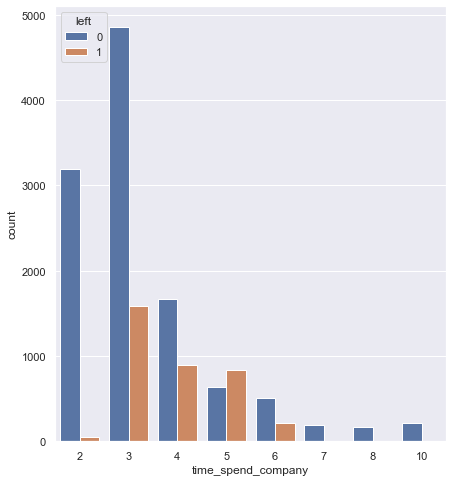

In [21]:
sns.set(rc={'figure.figsize':(7,8)})
sns.set_theme(style="darkgrid")
sns.countplot(x="time_spend_company", data=df, hue='left')

Most employees have spent 3 years in the company followed by 2 years

No one has stayed in the company for more than 7 years and left

## Work accident

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

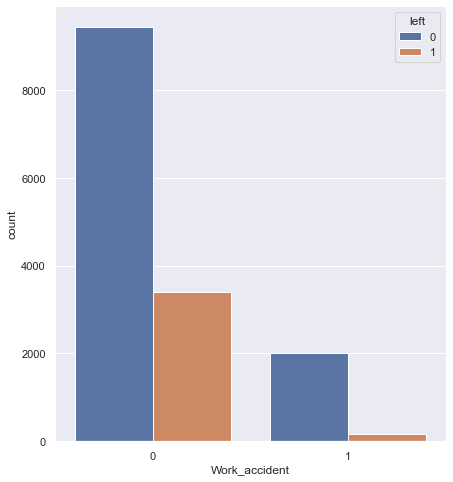

In [22]:
sns.set(rc={'figure.figsize':(7,8)})
sns.set_theme(style="darkgrid")
sns.countplot(x="Work_accident", data=df, hue='left')

In [14]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


## Correlation

In [15]:
df_heat=df.corr()

<AxesSubplot:>

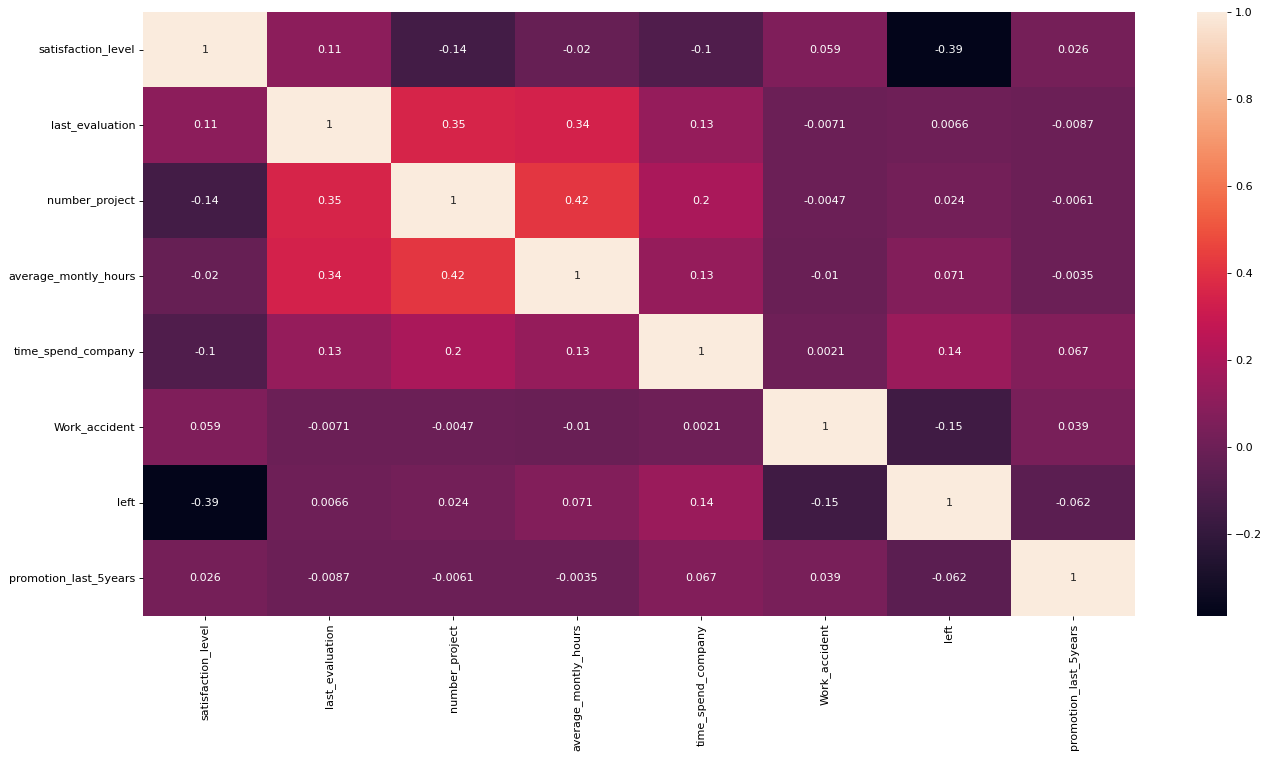

In [16]:
figure(figsize=(20,10),dpi=80)
sns.heatmap(df_heat,annot=True)

In [17]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Feature Engineering

## One-Hot Encoding

Machine learning algorithms can only deal with numerical features. However, in most scenarios, categorical features are prevalent. For example, a person’s gender, address, product type, weather, and so on are categorical features. To ensure the machine learning algorithm can use this information (features or fields), we need to transform these categorical features into numerical features. One-Hot encoding is one of the methods used for this transformation.

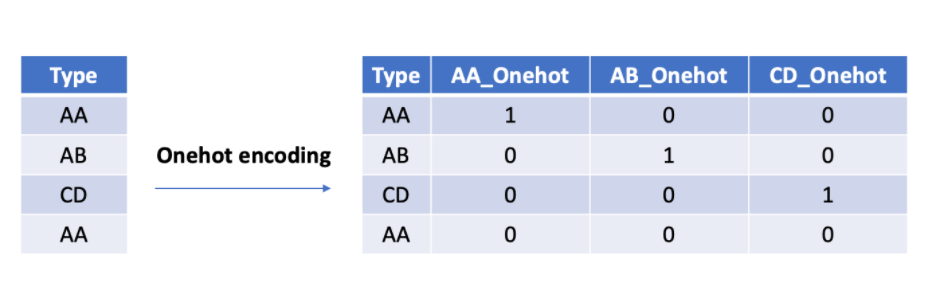

In [4]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [20]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [3]:
pd.get_dummies(df.salary)

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


In [6]:
salaries_dummies=pd.get_dummies(subdf.salary,prefix="salary")

In [7]:
salaries_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [8]:
##concatenation - merge columns
df=pd.concat([subdf,salaries_dummies],axis='columns')

In [39]:
df.sample(10)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
5984,0.96,158,0,high,0,1,0,0
4268,0.96,161,0,medium,0,0,0,1
5647,0.64,105,0,low,0,0,1,0
13206,0.67,224,0,low,0,0,1,0
2169,0.57,142,0,medium,0,0,0,1
2912,0.78,270,0,medium,0,0,0,1
3218,0.58,173,0,low,0,0,1,0
4625,0.78,260,0,medium,0,0,0,1
10507,0.54,166,0,medium,0,0,0,1
5226,0.93,183,0,low,0,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [9]:
df.drop('salary',inplace=True,axis='columns')

In [10]:
df.sample(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_low,salary_medium
1857,0.11,253,0,1,0,0,1
6431,0.73,222,0,0,0,0,1
2992,0.86,211,0,0,0,0,1
7126,0.93,188,0,0,0,1,0
1789,0.41,150,0,1,0,1,0


In [11]:
X=df.drop('left',axis='columns')


In [12]:
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [13]:
y=df[['left']]

In [14]:
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
14994,1
14995,1
14996,1
14997,1


In [14]:
y.value_counts()

left
0       11428
1        3571
dtype: int64

## Imbalanced dataset

<AxesSubplot:xlabel='left', ylabel='count'>

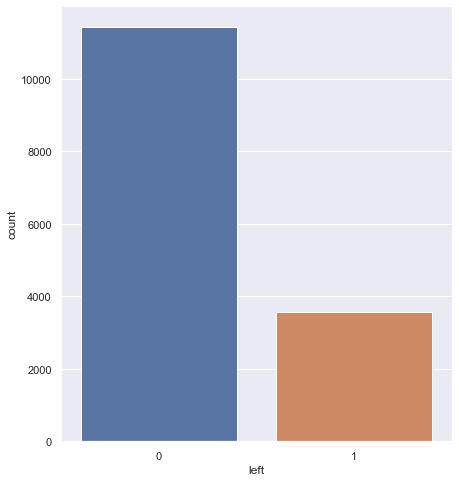

In [51]:
sns.set(rc={'figure.figsize':(7,8)})
sns.set_theme(style="darkgrid")
sns.countplot(x="left", data=)

In [28]:
## Upsampling ---> minority--->majority
## Downsampling ---> majority--->minority

## SMOTE -Synthetic Minority Oversampling Technique

In [ ]:
### Install
!pip install imbalanced-learn

In [15]:
y.value_counts()

left
0       11428
1        3571
dtype: int64

In [16]:
X.shape

(14999, 6)

In [17]:
y.shape

(14999, 1)

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
sm=SMOTE(random_state=42)

In [18]:
X,y=sm.fit_resample(X,y)

In [21]:
y.value_counts()

left
1       11428
0       11428
dtype: int64

In [22]:
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
22851,1
22852,1
22853,1
22854,1


In [25]:
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.380000,157,0,0,1,0
1,0.800000,262,0,0,0,1
2,0.110000,272,0,0,0,1
3,0.720000,223,0,0,1,0
4,0.370000,159,0,0,1,0
...,...,...,...,...,...,...
22851,0.100000,268,0,0,1,0
22852,0.422742,277,0,0,0,1
22853,0.740000,222,0,0,1,0
22854,0.436711,145,0,0,1,0


In [23]:
y.shape

(22856, 1)

In [24]:
X.shape

(22856, 6)

### Split Dataset

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [20]:
X_train.shape

(15999, 6)

In [21]:
y_train.shape

(15999, 1)

In [29]:
X_test.shape

(6857, 6)

In [30]:
y_test.shape

(6857, 1)

In [32]:
y_test

,left
6676,0
15045,1
108,1
2199,0
2426,0
...,...
14278,1
18923,1
8670,0
363,1


In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
model.fit(X_train, y_train)

C:\Users\jnngugi\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jnngugi\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [24]:
y_pred=model.predict(X_test)

In [25]:
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [40]:
y_test

,left
6676,0
15045,1
108,1
2199,0
2426,0
...,...
14278,1
18923,1
8670,0
363,1


In [26]:
model.score(X_test,y_test)

0.7166399299985416

Our model is 73% accurate

## Evaluate Errors

In [28]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72      3406
           1       0.72      0.71      0.72      3451

    accuracy                           0.72      6857
   macro avg       0.72      0.72      0.72      6857
weighted avg       0.72      0.72      0.72      6857



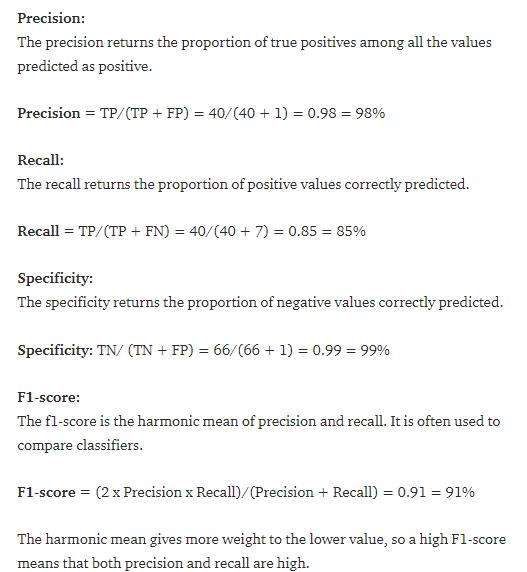

## Confusion Matrix

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

In [33]:
#confusion Matrix
from sklearn.metrics import confusion_matrix

In [35]:
cm=confusion_matrix(y_test,y_pred)

In [36]:
cm

array([[2464,  942],
       [1001, 2450]], dtype=int64)

In [44]:
import seaborn as sns

Text(33.0, 0.5, 'Actual')

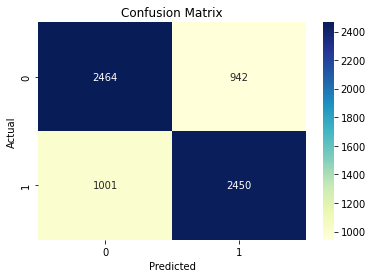

In [43]:
sns.heatmap(pd.DataFrame(cm),annot=True,fmt='g',cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(0.5, 48.5, 'Predicted label')

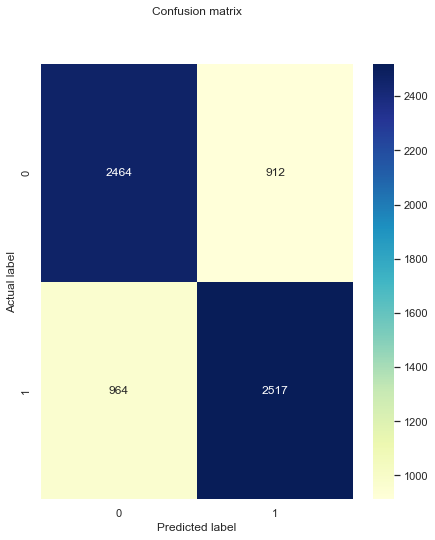

In [73]:
# confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

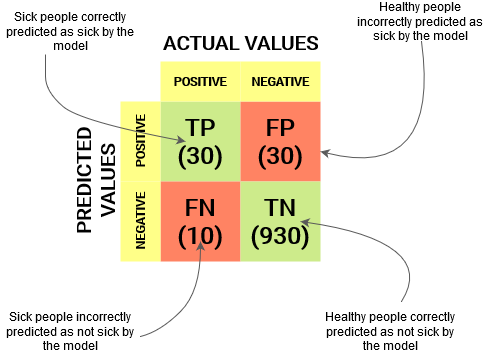

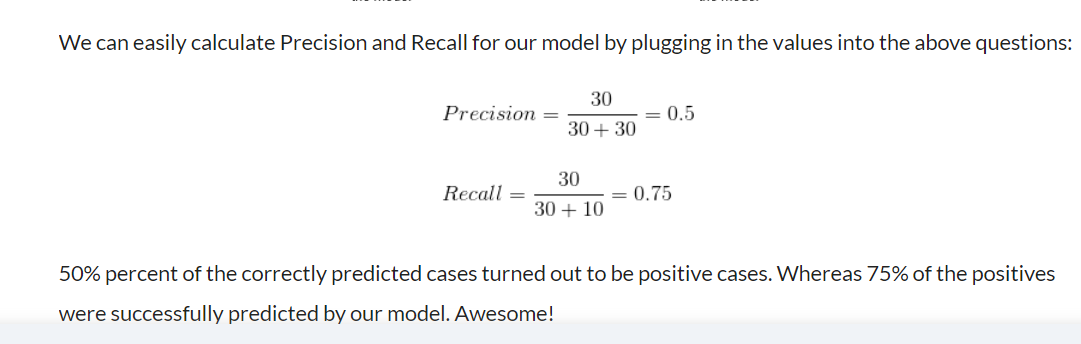

---

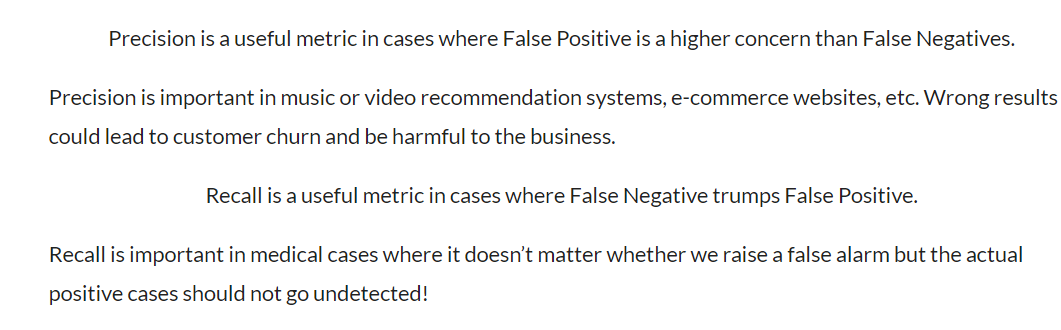

More Details

Precision tells us how many of the correctly predicted cases actually turned out to be positive

Recall tells us how many of the actual positive cases we were able to predict correctly with our model.

https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262

## Decision Tree

In [1]:
from sklearn import tree
clf_tree1 = tree.DecisionTreeClassifier()

In [2]:

clf_tree1.fit(X_train, y_train)

NameError: name 'X_train' is not defined